In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from tqdm import tqdm

In [2]:
sns.set_style('whitegrid')

In [3]:
# параметры расчёта
accepted = 1000000 # сумма принятх заказов за месяц
executed = 0.9700 # средняя исполняемость в процентах от принятых
margin = 0.4200 # средняя наценка

# количество менеджеров
managers_min = 2 # минимум
managers_max = 4 # максимум
managers_step = 1 # шаг изменения

# зарплата одного менеджера
salary_min = 50000 # минимум
salary_max = 80000 # максиимум
salary_step = 5000 # шаг изменения

# площадь розничной точки
square_min = 80 # минимум
square_max = 110 # максиимум
square_step = 1 # шаг изменения

# цена за квадратный метр
square_price_min = 800 # минимум
square_price_max = 1600 # максиимум
square_price_step = 50 # шаг изменения

In [4]:
df = pd.DataFrame()

# интервалы для подбора параметров
managers_range = range(managers_min, managers_max+1, managers_step)
salary_range = range(salary_min, salary_max+1, salary_step)
square_range = range(square_min, square_max+1, square_step)
square_price_range = range(square_price_min, square_price_max+1, square_price_step)

for i in tqdm(range(100000)):
    # определение параметров расчёта
    p_executed = 1
    while p_executed > 0.99:
        p_executed = np.round(np.random.normal(executed, 0.0199 / 5, 1)[0], decimals=4)
    p_margin = 1
    while p_margin > margin + 0.0199 * 5:
        p_margin = np.round(np.random.normal(margin, 0.0199 / 5, 1)[0], decimals=4)
    p_managers = np.random.choice(managers_range)
    p_salary = np.random.choice(salary_range)
    p_square = np.random.choice(square_range)
    p_square_price = np.random.choice(square_price_range)

    # расчёт прибыли с округлением до рубля
    profit = \
        accepted * p_executed * p_margin / (1 + p_margin) - \
        p_managers * p_salary - \
        p_square * p_square_price

    profit = np.round(profit, decimals=0)
    df = df.append({'accepted': accepted,
                    'executed': p_executed,
                    'margin': p_margin,
                    'managers': p_managers,
                    'salary': p_salary,
                    'square': p_square,
                    'square_price': p_square_price,
                    'profit': profit}, 
                   ignore_index=True)
    
    df['result'] = np.where(df['profit'] > 0, 'прибыль', 
                            np.where(df['profit'] < 0, 'убыток', 'ноль'))

df = df[['accepted', 'executed', 'margin', 'managers', 'salary', 'square', 'square_price', 'profit', 'result']]

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [27:51<00:00, 59.84it/s]


In [5]:
df['result'].value_counts(normalize=True) * 100

убыток     59.297
прибыль    40.703
Name: result, dtype: float64

In [6]:
df['profit'].describe(percentiles=np.linspace(5, 95, 19) / 100)

count    100000.000000
mean     -22356.096990
std       66720.688513
min     -213096.000000
5%      -140034.200000
10%     -116272.200000
15%      -98037.000000
20%      -83025.200000
25%      -69792.000000
30%      -58233.600000
35%      -47057.050000
40%      -36905.400000
45%      -26979.450000
50%      -17561.000000
55%       -8061.000000
60%        1243.000000
65%       10548.100000
70%       20252.900000
75%       30085.250000
80%       39983.600000
85%       49943.300000
90%       61536.100000
95%       78385.100000
max      127161.000000
Name: profit, dtype: float64

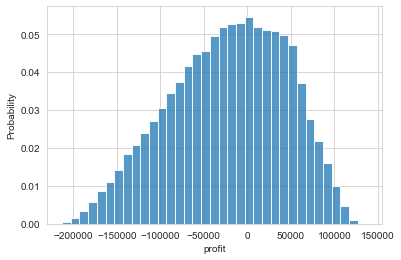

In [7]:
sns.histplot(df['profit'], stat='probability', binwidth=10000);

In [8]:
# добавляем столбец группировки по прибыле
freq = 10000
interval_range = pd.interval_range(start=np.floor(df['profit'].min() / freq) * freq,
                                   end=np.ceil(df['profit'].max() / freq) * freq,
                                   freq=freq,
                                   closed='left')
df['profit_interval'] = pd.cut(df['profit'], bins=interval_range)

In [9]:
df['profit_interval'].value_counts(normalize=True).iloc[:10]

[0.0, 10000.0)          0.05444
[-10000.0, 0.0)         0.05359
[-20000.0, -10000.0)    0.05269
[-30000.0, -20000.0)    0.05184
[10000.0, 20000.0)      0.05135
[20000.0, 30000.0)      0.05086
[30000.0, 40000.0)      0.05046
[40000.0, 50000.0)      0.05016
[-40000.0, -30000.0)    0.04988
[-50000.0, -40000.0)    0.04808
Name: profit_interval, dtype: float64

In [10]:
df.query('profit > 50000').describe()

,accepted,executed,margin,managers,salary,square,square_price,profit
count,14976.0,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000
mean,1000000.0,0.970233,0.420236,2.063168,58765.691774,92.328926,1020.569578,72465.715345
std,0.0,0.004032,0.003963,0.243273,8282.002985,8.677212,187.251635,16787.967084
min,1000000.0,0.954700,0.404200,2.000000,50000.000000,80.000000,800.000000,50001.000000
25%,1000000.0,0.967500,0.417600,2.000000,50000.000000,85.000000,850.000000,58381.750000
50%,1000000.0,0.970200,0.420200,2.000000,55000.000000,91.000000,1000.000000,69005.000000
75%,1000000.0,0.973000,0.422900,2.000000,65000.000000,99.000000,1150.000000,83820.500000
max,1000000.0,0.988000,0.436000,3.000000,80000.000000,110.000000,1600.000000,127161.000000
